<a href="https://colab.research.google.com/github/guilhermelaviola/IntegrativePracticeInDataScience/blob/main/Class02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**
Data Science employs various tools and techniques to derive insights from raw data, with key processes including data visualization, data cleaning, statistical analysis, and data summarization. Data visualization presents data graphically using tools like Power BI to highlight patterns. Data cleaning ensures quality by correcting errors and inconsistencies, often using tools such as OpenRefine. Statistical analysis follows, utilizing software like Excel for hypothesis testing and trend analysis. For large datasets, rapid summarization techniques, such as those enabled by the Hadoop framework with MapReduce, help process data efficiently. Manipulation of datasets and dataframes is common, with MySQL being a widely used tool for storing and querying structured data. Overall, the choice of tools and techniques in Data Science is contingent on data type, volume, and analytical goals.

In [8]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Example: Raw Data Simulating Raw**
Sample data is artificially created data that mimics real-world raw data. It is used for testing, training, experimentation, and demonstrations when real data is unavailable, sensitive, or incomplete.

In [9]:
# Creatinga  fictional dataset:
data = {
    'customer_id': [101, 102, 103, 104, 105],
    'complaint_type': ['Network Issue', 'network issue', 'Billing', 'billing ', 'NETWORK-ISSUE'],
    'resolution_time': [24, 48, np.nan, 12, 36],
    'signal_strength': [2, None, 4, 5, 1],
    'location': ['NYC', 'New York', 'NY', 'New York', 'NYC']
}

df = pd.DataFrame(data)
print(df)

   customer_id complaint_type  resolution_time  signal_strength  location
0          101  Network Issue             24.0              2.0       NYC
1          102  network issue             48.0              NaN  New York
2          103        Billing              NaN              4.0        NY
3          104       billing              12.0              5.0  New York
4          105  NETWORK-ISSUE             36.0              1.0       NYC


## **Example: Data Cleaning**
Data cleaning is the process of detecting and correcting errors, inconsistencies, duplicates, missing values, and formatting problems in datasets. Tools like OpenRefine help standardize and prepare messy raw data for accurate analysis.

In [10]:
# Standardizing complaint types:
df['complaint_type'] = (
    df['complaint_type']
    .str.lower()
    .str.replace('-', ' ')
    .str.strip()
)

# Cleaning location values:
df['location'] = df['location'].replace({'NYC': 'New York', 'NY': 'New York'})

# Handling missing values:
df['resolution_time'] = df['resolution_time'].fillna(df['resolution_time'].mean())
df['signal_strength'] = df['signal_strength'].fillna(df['signal_strength'].mean())

print('\nCleaned data:')
print(df)


Cleaned data:
   customer_id complaint_type  resolution_time  signal_strength  location
0          101  network issue             24.0              2.0  New York
1          102  network issue             48.0              3.0  New York
2          103        billing             30.0              4.0  New York
3          104        billing             12.0              5.0  New York
4          105  network issue             36.0              1.0  New York


## **Example: Statistical Analysis**
Statistical analysis involves applying mathematical techniques to data to uncover patterns, relationships, and trends. This includes calculations like mean, median, standard deviation, correlation, and regression—similar to functions available in Excel.

In [11]:
# Calculating average resolution time per complaint type:
summary_stats = df.groupby('complaint_type')['resolution_time'].mean()
print('\nAverage resolution time per complaint:')
print(summary_stats)


Average resolution time per complaint:
complaint_type
billing          21.0
network issue    36.0
Name: resolution_time, dtype: float64


In [12]:
# Finding the correlation between signal strength and resolution time:
correlation = df['signal_strength'].corr(df['resolution_time'])
print('\nCorrelation between signal strength and resolution time:')
print(correlation)


Correlation between signal strength and resolution time:
-0.49497474683058323


## **Example: Data Summarization**
Data summarization reduces large datasets into concise, meaningful summaries such as totals, averages, counts, or grouped results. Like Hadoop’s MapReduce model, it processes large-scale data by breaking it into smaller parts and aggregating the results.

In [13]:
# Simulating counting complaints per location:
complaint_counts = df.groupby('location')['complaint_type'].count()
print('\nNumber of complaints per location:')
print(complaint_counts)


Number of complaints per location:
location
New York    5
Name: complaint_type, dtype: int64


## **Example: Data Visualization**
Data visualization is the graphical representation of data using charts, graphs, dashboards, and maps to make insights easier to understand. Tools like Power BI or Python libraries (e.g., Matplotlib, Seaborn, Plotly) help transform data into visual stories for decision-making.

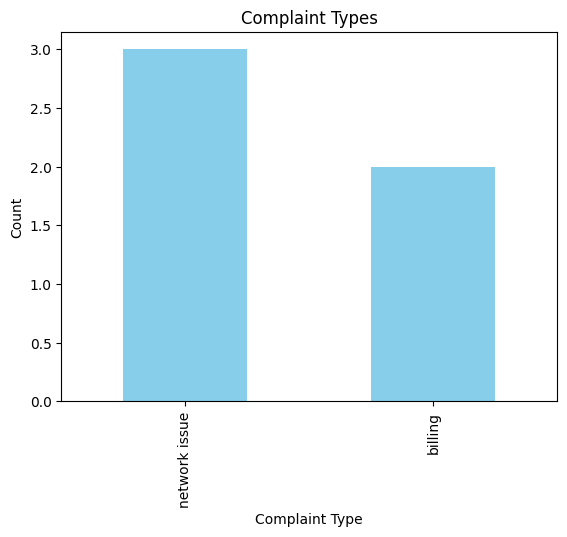

In [14]:
# Using a bar chart to display the results:
df['complaint_type'].value_counts().plot(kind='bar', title='Complaint Types', color='skyblue')
plt.xlabel('Complaint Type')
plt.ylabel('Count')
plt.show()